# Fashion MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense, Input, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

2025-02-18 18:05:20.919146: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 18:05:20.943352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739919920.975622   31160 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739919920.984331   31160 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 18:05:21.011451: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Here are the names of the 10 classes

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Things to do:
*  Plot a histogram of the class labels to determine balance
*  Plot some random entries from the dataset and their class name
*  Create a DNN based on the MNIST one we made. Use any topology and activation functions you want.
*  When you 'compile' the model, include `metrics=['accuracy']`
*  Train the model
*  Plot the accuracies using the plot code below
*  Evaluate the model on the **test** set and report the result
*  Repeat the last 5 steps -- try to get the best test accuracy
*  Print a confusion matrix (10x10) for the test set
*  Make a grid showing a selection of the misclassified samples, along with their label (probably need to google this)

## Training the model

In [5]:
x_train = x_train.reshape(60000, 28, 28).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

y_train = y_train.reshape(60000, 10)
y_test = y_test.reshape(10000, 10)

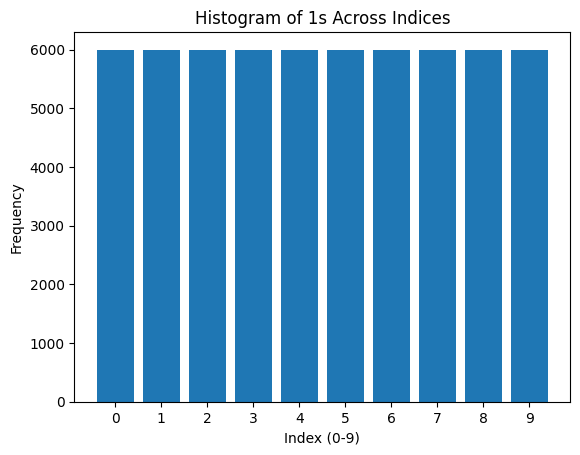

In [6]:
plot = y_train.reshape(60000,10);
counts = np.sum(plot, axis=0)
plt.bar(range(10), counts)

plt.xlabel("Index (0-9)")
plt.ylabel("Frequency")
plt.title("Histogram of 1s Across Indices")
plt.xticks(range(10))
plt.show()

Bag


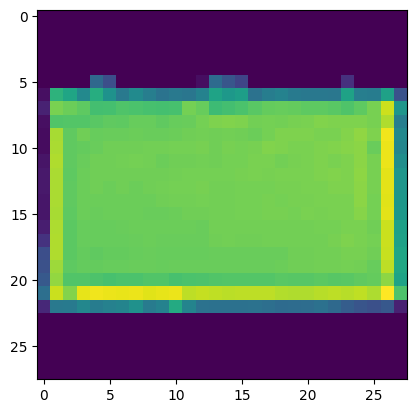

In [7]:
i = random.randint(0,x_train.shape[0])
print(class_names[y_train[i].argmax()])
plt.imshow(x_train[i]);

In [8]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(), 
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax')  
])

I0000 00:00:1739919929.992688   31160 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2256 MB memory:  -> device: 0, name: NVIDIA T500, pci bus id: 0000:01:00.0, compute capability: 7.5


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(x_train, y_train, epochs = 30, batch_size = 512, validation_split = 0.1)
model.evaluate(x_test, y_test)

Epoch 1/30


I0000 00:00:1739919932.460408   31241 service.cc:148] XLA service 0x7f75440034a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739919932.460454   31241 service.cc:156]   StreamExecutor device (0): NVIDIA T500, Compute Capability 7.5
2025-02-18 18:05:32.486324: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739919932.561732   31241 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-18 18:05:33.900225: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 15/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.5306 - loss: 1.3893

I0000 00:00:1739919934.262762   31241 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - categorical_accuracy: 0.7294 - loss: 0.7889 - val_categorical_accuracy: 0.8362 - val_loss: 0.4579
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - categorical_accuracy: 0.8520 - loss: 0.4209 - val_categorical_accuracy: 0.8657 - val_loss: 0.3753
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.8712 - loss: 0.3679 - val_categorical_accuracy: 0.8685 - val_loss: 0.3631
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.8814 - loss: 0.3365 - val_categorical_accuracy: 0.8767 - val_loss: 0.3474
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.8868 - loss: 0.3136 - val_categorical_accuracy: 0.8838 - val_loss: 0.3261
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - categorical_accuracy: 0.8942 - loss: 0.2955 - val_categorical_accuracy: 0.8692 - val_loss: 0.3619
Epoch 7/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - categorical_accuracy: 0.8987 - loss: 0

[0.3425033390522003, 0.8910999894142151]

In [10]:
from sklearn.metrics import accuracy_score
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test_pred = y_test.argmax(axis=1)
print('Accuracy:',accuracy_score(y_test_pred,y_pred)*100, '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 89.11 %


Predicted: Dress
Actual: Dress


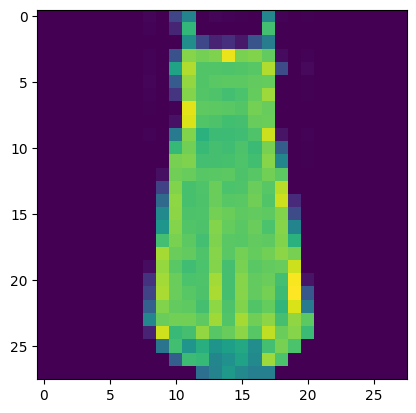

In [11]:
i = random.randint(0,x_test.shape[0])
print('Predicted:', class_names[y_pred[i]])
print('Actual:', class_names[y_test[i].argmax()])
plt.imshow(x_test[i]);

## Plotting the Results

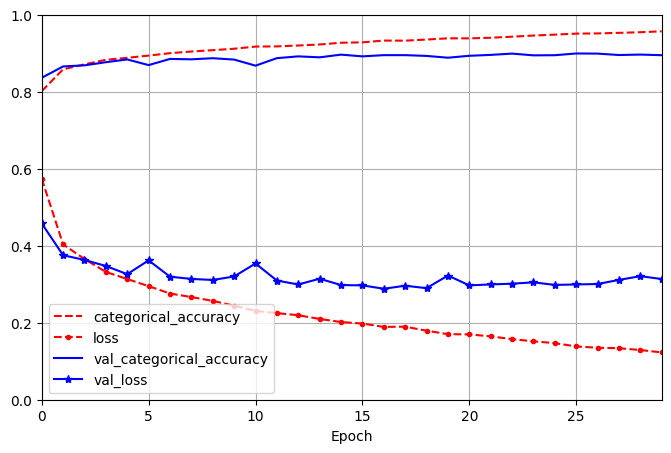

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Class 0: Misclassified = 218 samples
Class 1: Misclassified = 16 samples
Class 2: Misclassified = 191 samples
Class 3: Misclassified = 163 samples
Class 4: Misclassified = 180 samples
Class 5: Misclassified = 33 samples
Class 6: Misclassified = 186 samples
Class 7: Misclassified = 27 samples
Class 8: Misclassified = 29 samples
Class 9: Misclassified = 46 samples


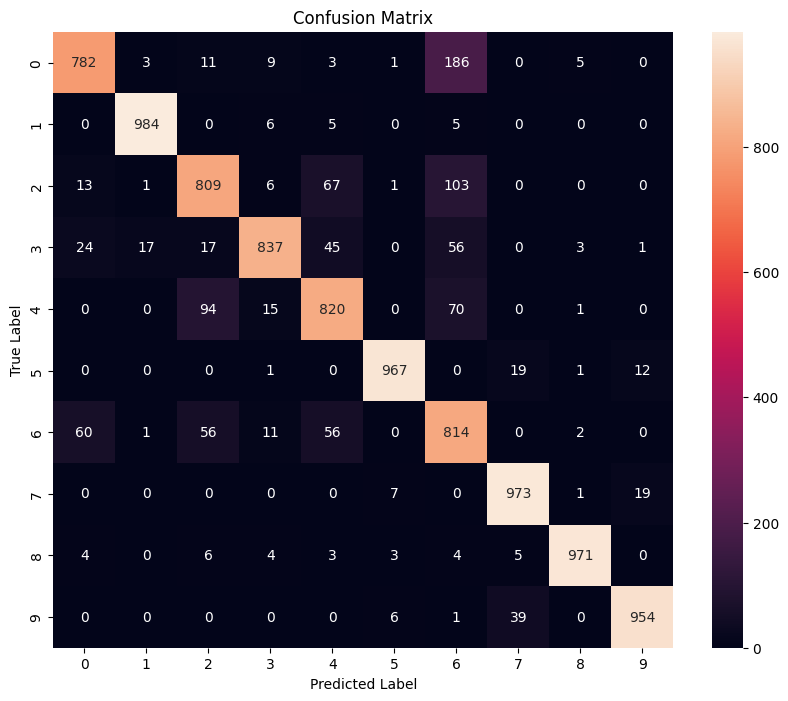

In [31]:
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

misclassified_per_class = cm.sum(axis=1) - np.diagonal(cm)

# Print the number of misclassified samples for each class
for i in range(10):
    print(f"Class {i}: Misclassified = {misclassified_per_class[i]} samples")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Display your model

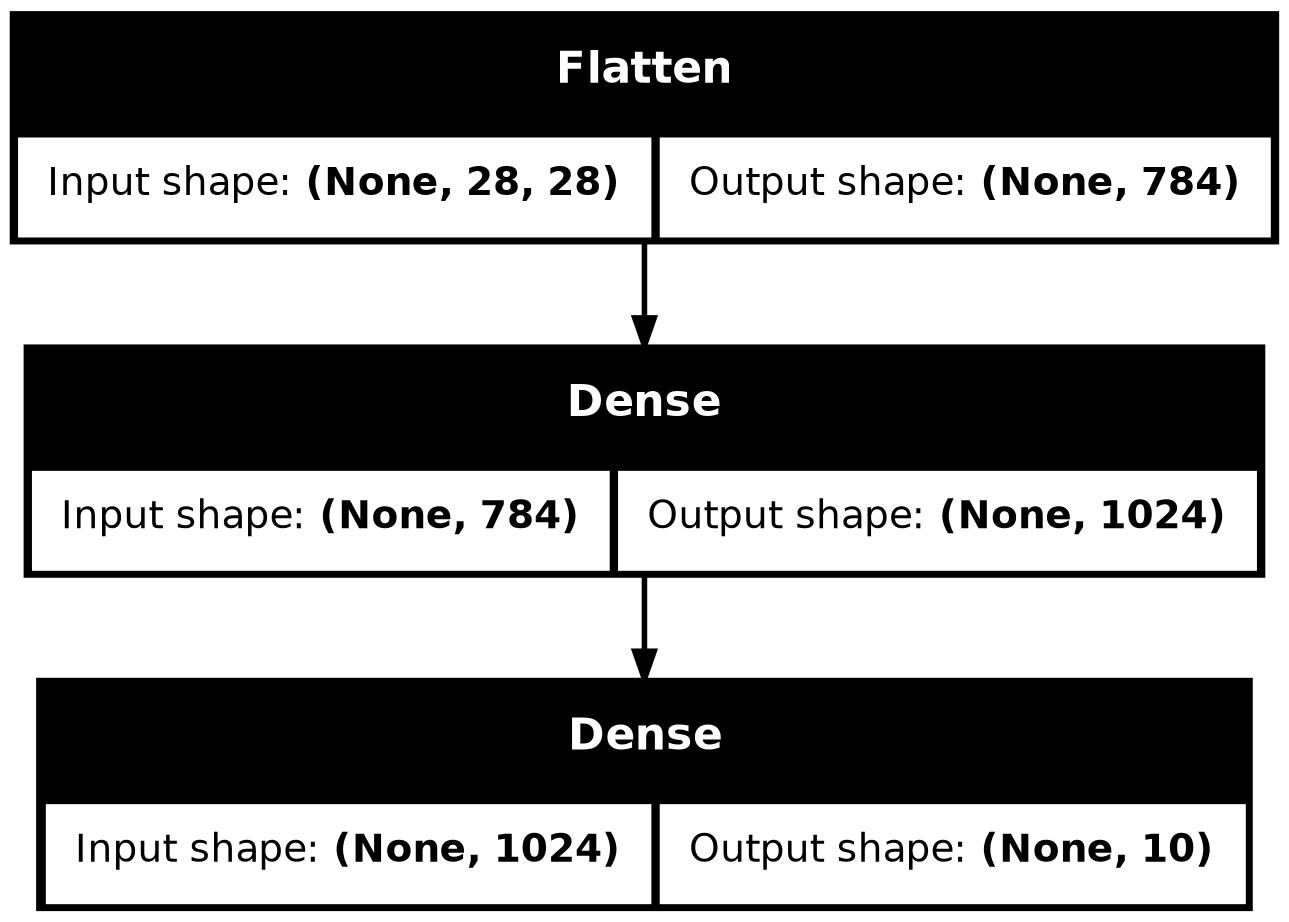

In [15]:
tf.keras.utils.plot_model(model, "Fashion-Mnist.png", show_shapes=True)

## A selection of misclassified samples

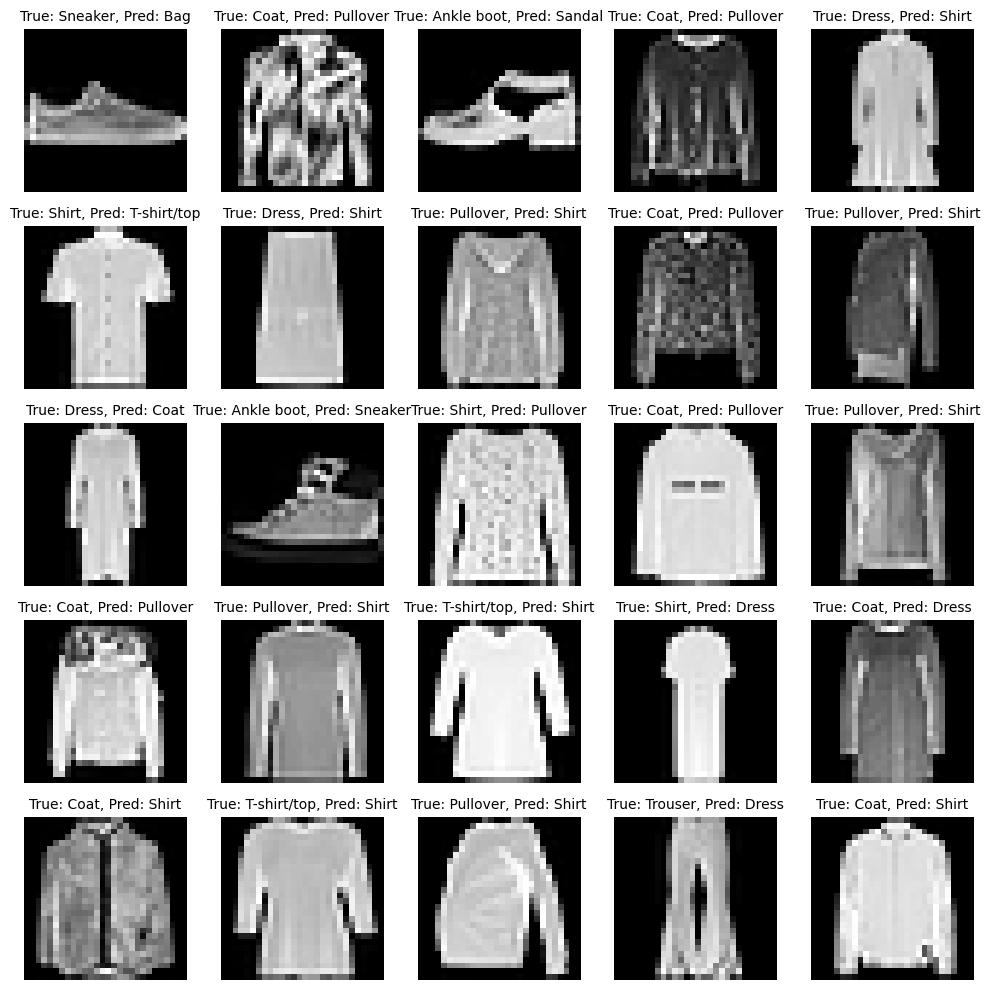

In [29]:
# your code
miss_indexes = np.where(y_test != y_pred)[0]
miss_images = x_test[miss_indexes]
miss_true_labels = y_test[miss_indexes]
miss_predicted_labels = y_pred[miss_indexes]  
num_images = 25  # Number of images to display in the grid (e.g., 3x3 grid)
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(5, 5, i + 1)  # Create a 3x3 grid of images
    plt.imshow(miss_images[i], cmap='gray')
    plt.title(f"True: {class_names[miss_true_labels[i]]}, Pred: {class_names[miss_predicted_labels[i]]}", fontsize = 10)
    plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()
